## ARIMA

AR + I + MA

AutoRegression
Integrated
Moving Average

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd
import pandas_datareader as pdr

%matplotlib inline

In [7]:
!pip install yfinance
import yfinance as yf

# Define the ticker symbol
ticker = 'TSLA'

# Retrieve the data
df_tesla = yf.download(ticker)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.


  Using cached pytz-2023.3-py2.py3-none-any.whl (502 kB)
  Attempting uninstall: pytz
    Found existing installation: pytz 2021.3
    Uninstalling pytz-2021.3:
      Successfully uninstalled pytz-2021.3
  Attempting uninstall: lxml
    Found existing installation: lxml 4.6.3
    Uninstalling lxml-4.6.3:
      Successfully uninstalled lxml-4.6.3
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.10.0
    Uninstalling beautifulsoup4-4.10.0:
      Successfully uninstalled beautifulsoup4-4.10.0
[*********************100%***********************]  1 of 1 completed


In [8]:
df_tesla

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2023-07-07,278.429993,280.779999,273.769989,274.429993,274.429993,113602000
2023-07-10,276.470001,277.519989,265.100006,269.609985,269.609985,119425400
2023-07-11,268.649994,270.899994,266.369995,269.790009,269.790009,91972400


In [9]:
df_tesla.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
df_tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [11]:
df_tesla.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-07,278.429993,280.779999,273.769989,274.429993,274.429993,113602000
2023-07-10,276.470001,277.519989,265.100006,269.609985,269.609985,119425400
2023-07-11,268.649994,270.899994,266.369995,269.790009,269.790009,91972400
2023-07-12,276.329987,276.519989,271.459991,271.989990,271.989990,95672100
2023-07-13,274.589996,279.450012,270.600006,277.899994,277.899994,112429100


In [12]:
df_tesla.dropna(axis=0,inplace=True)

In [13]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3282 entries, 2010-06-29 to 2023-07-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3282 non-null   float64
 1   High       3282 non-null   float64
 2   Low        3282 non-null   float64
 3   Close      3282 non-null   float64
 4   Adj Close  3282 non-null   float64
 5   Volume     3282 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 179.5 KB


In [14]:
#df_tesla['Month']=pd.to_datetime(df_tesla['Month'])
df_tesla=df_tesla.reset_index()

In [15]:
df_tesla

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3277,2023-07-07,278.429993,280.779999,273.769989,274.429993,274.429993,113602000
3278,2023-07-10,276.470001,277.519989,265.100006,269.609985,269.609985,119425400
3279,2023-07-11,268.649994,270.899994,266.369995,269.790009,269.790009,91972400
3280,2023-07-12,276.329987,276.519989,271.459991,271.989990,271.989990,95672100


In [16]:
df_tesla=df_tesla.set_index('Date',drop=True)

<AxesSubplot:xlabel='Date'>

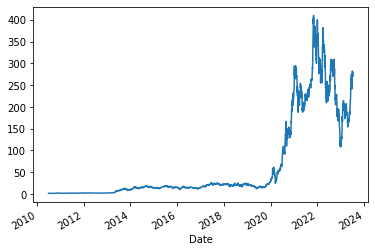

In [17]:
df_tesla['Close'].plot()

In [18]:
from statsmodels.tsa.stattools import adfuller

In [19]:
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1]<=0.05:
        print("reject null hypothesis,strong evi against null hypo, has unit root<1, stat")
    else:
        print("reject alternate hypothesis, weak evi against null hypo, has unit root=1,non stat")

In [20]:
adf_test(df_tesla['Open'])

ADF Statistics: -0.6811842167655371
p- value: 0.8515632395693922
reject alternate hypothesis, weak evi against null hypo, has unit root=1,non stat


In [21]:
df_tesla['First Diff']=df_tesla['Open']-df_tesla['Open'].shift(1)

In [22]:
df_tesla

,Open,High,Low,Close,Adj Close,Volume,First Diff
Date,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0.452666
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,-0.052666
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,-0.133334
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,-0.200000
...,...,...,...,...,...,...,...
2023-07-07,278.429993,280.779999,273.769989,274.429993,274.429993,113602000,0.339996
2023-07-10,276.470001,277.519989,265.100006,269.609985,269.609985,119425400,-1.959991
2023-07-11,268.649994,270.899994,266.369995,269.790009,269.790009,91972400,-7.820007


In [23]:
adf_test(df_tesla['First Diff'].dropna())

ADF Statistics: -10.57052928057451
p- value: 7.3252438552115065e-19
reject null hypothesis,strong evi against null hypo, has unit root<1, stat


In [24]:
#do more diff if not stat
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

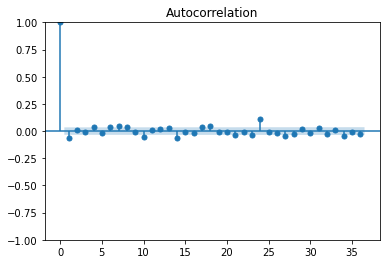

In [25]:
acf = plot_acf(df_tesla['First Diff'].dropna())

D:\Annaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


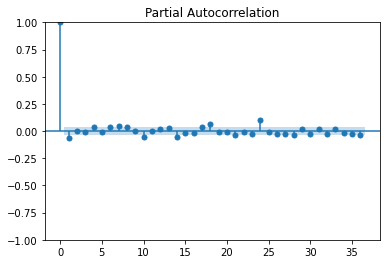

In [26]:
pacf = plot_pacf(df_tesla['First Diff'].dropna())

In [27]:
df_tesla

,Open,High,Low,Close,Adj Close,Volume,First Diff
Date,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0.452666
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,-0.052666
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,-0.133334
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,-0.200000
...,...,...,...,...,...,...,...
2023-07-07,278.429993,280.779999,273.769989,274.429993,274.429993,113602000,0.339996
2023-07-10,276.470001,277.519989,265.100006,269.609985,269.609985,119425400,-1.959991
2023-07-11,268.649994,270.899994,266.369995,269.790009,269.790009,91972400,-7.820007


In [28]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2021,10,11)
test_dataset_end=datetime(2022,11,11)

In [29]:
train_data=df_tesla[:train_dataset_end]
test_data=df_tesla[train_dataset_end+timedelta(days=1):test_dataset_end]

In [30]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [31]:
test_data

,Open,High,Low,Close,Adj Close,Volume,First Diff
Date,,,,,,,
2021-10-12,266.976654,270.773346,265.523346,268.573334,268.573334,66060000,4.426666
2021-10-13,270.156677,271.803345,268.593323,270.359985,270.359985,42360300,3.180023
2021-10-14,271.829987,273.416656,271.116669,272.773346,272.773346,36741600,1.673309
2021-10-15,274.579987,281.070007,274.116669,281.010010,281.010010,56773800,2.750000
2021-10-18,283.929993,291.753326,283.823334,290.036682,290.036682,72621600,9.350006
...,...,...,...,...,...,...,...
2022-11-07,208.649994,208.899994,196.660004,197.080002,197.080002,93916500,-13.950012
2022-11-08,194.020004,195.199997,186.750000,191.300003,191.300003,128803400,-14.629990
2022-11-09,190.779999,195.889999,177.119995,177.589996,177.589996,127062700,-3.240005


In [32]:
train_data

,Open,High,Low,Close,Adj Close,Volume,First Diff
Date,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0.452666
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,-0.052666
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,-0.133334
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,-0.200000
...,...,...,...,...,...,...,...
2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,-3.899994
2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,-2.866669
2021-10-07,261.820007,268.333344,261.126678,264.536682,264.536682,57587400,3.086670


In [33]:
from statsmodels.tsa.arima.model import ARIMA
model_Arima = ARIMA(train_data['Open'],order=(6,1,4))

D:\Annaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Annaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Annaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [34]:
model_fit=model_Arima.fit()

D:\Annaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Annaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
D:\Annaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [35]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Open   No. Observations:                 2842
Model:                 ARIMA(6, 1, 4)   Log Likelihood               -6780.237
Date:                Fri, 14 Jul 2023   AIC                          13582.474
Time:                        13:56:19   BIC                          13647.945
Sample:                             0   HQIC                         13606.090
                               - 2842                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3437      0.013     25.995      0.000       0.318       0.370
ar.L2         -0.4039      0.015    -26.733      0.000      -0.434      -0.374
ar.L3          0.2972      0.013     22.162      0.000       0.271       0.324
ar.L4         -0.8757      0.011    -80.549      0.000      -0.897      -0.854
ar.L5         -0.0736      0.009     -8.103      0.000      -0.091      -0.056
ar.L6          0.0080      0.008      0.999      0.318      -0.008       0.024
ma.L1         -0.4206      0.010    -40.148      0.000      -0.441      -0.400
ma.L2          0.3480      0.012     28.833      0.000       0.324       0.372
ma.L3         -0.2765      0.012    -23.627      0.000      -0.299      -0.254
ma.L4          0.8820      0.009     96.849      0.000       0.864       0.900
sigma2         6.9240      0.047    146.292      0.000       6.831       7.017
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):            131402.30
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):             369.88   Skew:                             0.00
Prob(H) (two-sided):                  0.00   Kurtosis:                        36.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Date'>

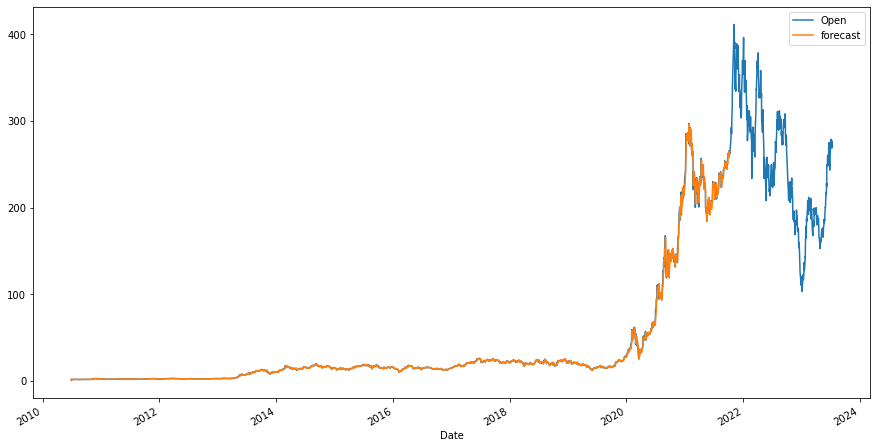

In [36]:
df_tesla['forecast']=model_fit.predict()
df_tesla[['Open','forecast']].plot(figsize=(15,8))

In [37]:
df_tesla.drop(['forecast'],axis=1)

,Open,High,Low,Close,Adj Close,Volume,First Diff
Date,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0.452666
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,-0.052666
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,-0.133334
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,-0.200000
...,...,...,...,...,...,...,...
2023-07-07,278.429993,280.779999,273.769989,274.429993,274.429993,113602000,0.339996
2023-07-10,276.470001,277.519989,265.100006,269.609985,269.609985,119425400,-1.959991
2023-07-11,268.649994,270.899994,266.369995,269.790009,269.790009,91972400,-7.820007


In [38]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [39]:
model_sarima = SARIMAX(train_data['Open'],order=(1,1,1),seasonal_order=(1,1,1,12))

D:\Annaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Annaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [40]:
results=model_sarima.fit()

<AxesSubplot:xlabel='Date'>

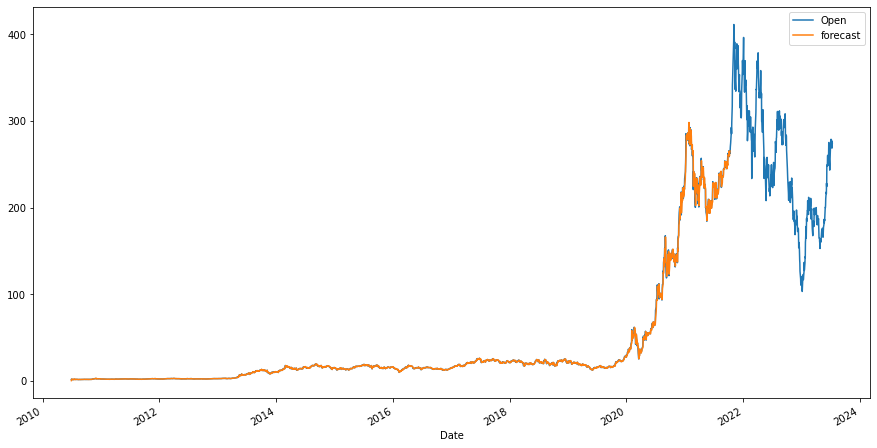

In [41]:
df_tesla['forecast']=results.predict()
df_tesla[['Open','forecast']].plot(figsize=(15,8))

In [42]:
from pandas.tseries.offsets import DateOffset
future_dates=[df_tesla.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [43]:
future_dates

[Timestamp('2023-07-13 00:00:00'),
 Timestamp('2023-08-13 00:00:00'),
 Timestamp('2023-09-13 00:00:00'),
 Timestamp('2023-10-13 00:00:00'),
 Timestamp('2023-11-13 00:00:00'),
 Timestamp('2023-12-13 00:00:00'),
 Timestamp('2024-01-13 00:00:00'),
 Timestamp('2024-02-13 00:00:00'),
 Timestamp('2024-03-13 00:00:00'),
 Timestamp('2024-04-13 00:00:00'),
 Timestamp('2024-05-13 00:00:00'),
 Timestamp('2024-06-13 00:00:00'),
 Timestamp('2024-07-13 00:00:00'),
 Timestamp('2024-08-13 00:00:00'),
 Timestamp('2024-09-13 00:00:00'),
 Timestamp('2024-10-13 00:00:00'),
 Timestamp('2024-11-13 00:00:00'),
 Timestamp('2024-12-13 00:00:00'),
 Timestamp('2025-01-13 00:00:00'),
 Timestamp('2025-02-13 00:00:00'),
 Timestamp('2025-03-13 00:00:00'),
 Timestamp('2025-04-13 00:00:00'),
 Timestamp('2025-05-13 00:00:00'),
 Timestamp('2025-06-13 00:00:00')]

In [44]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df_tesla.columns)
future_datest_df.tail()

,Open,High,Low,Close,Adj Close,Volume,First Diff,forecast
2025-02-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-03-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-04-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-05-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-06-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
future_df=pd.concat([df_tesla,future_datest_df])

<AxesSubplot:>

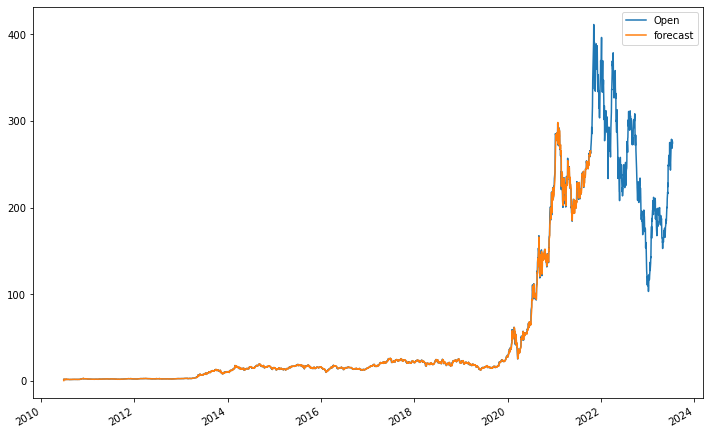

In [46]:
future_df['forecast'] = results.predict()  
future_df[['Open', 'forecast']].plot(figsize=(12, 8))

In [47]:
future_df

,Open,High,Low,Close,Adj Close,Volume,First Diff,forecast
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN,0.000000
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0.452666,1.266666
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,-0.052666,1.719332
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,-0.133334,1.666667
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,-0.200000,1.533333
...,...,...,...,...,...,...,...,...
2025-02-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-03-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-04-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-05-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
